# Feature detection

In [96]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Blob detection

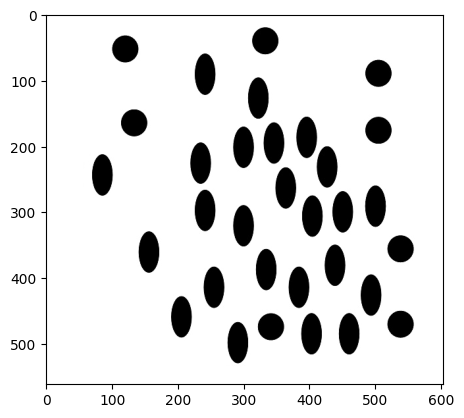

In [97]:
# Load image
image = cv2.imread('../../data/blobs.jpg')

# To grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(gray, cmap='gray')  
plt.show()  

The first detector is created with default parameters and detects all blobs in the image. 

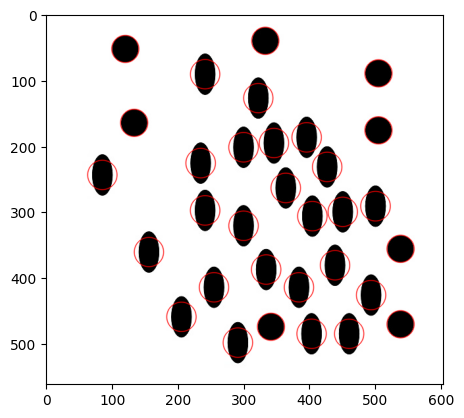

In [98]:
# Create blob detector without params
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(gray)

# Draw the blobs
blobs_1 = cv2.drawKeypoints(image, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show image
plt.imshow(blobs_1)  
plt.show()  

The second detector is created with custom parameters that filter on circularity. Now only the circular blobs are detected. 

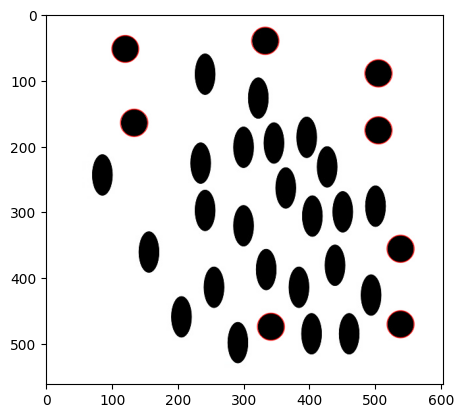

In [99]:
# Set params
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.filterByCircularity = True
params.minCircularity = 0.9
params.filterByConvexity = False
params.minConvexity = 0.2
params.filterByInertia = True
params.minConvexity = 0.01

# Create blob detector with params
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(gray)

# Draw the blobs
blobs_2 = cv2.drawKeypoints(image, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show image
plt.imshow(blobs_2)  
plt.show()

## Corner detection

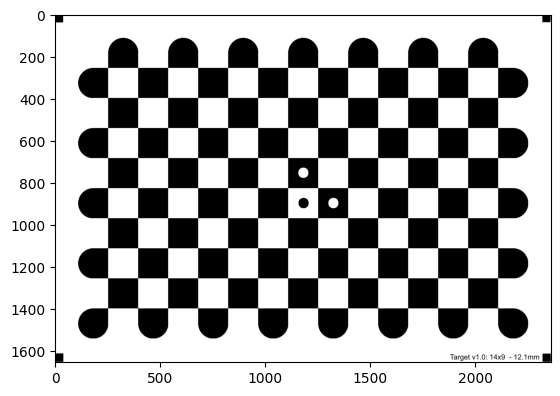

In [100]:
# Load image
image = cv2.imread('../../data/checkerboard_radon.png')

# To grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(gray, cmap='gray')  
plt.show()  

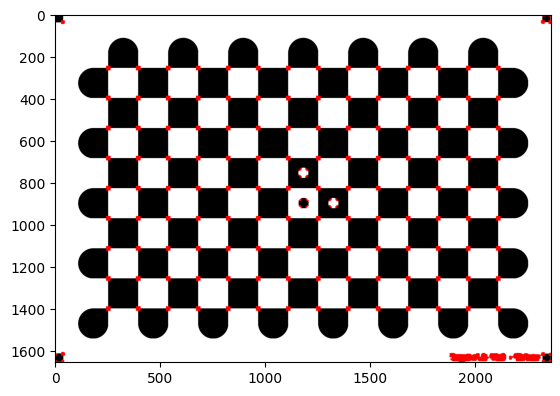

In [101]:
# Detect Harris corners
dst = cv2.cornerHarris(gray, 20, 7, 0.05)

# Threshold for an optimal value, it may vary depending on the image.
image[dst > 0.01 * dst.max()] = [255, 0, 0]

# Show result
plt.imshow(image)
plt.show()

## Edge detection

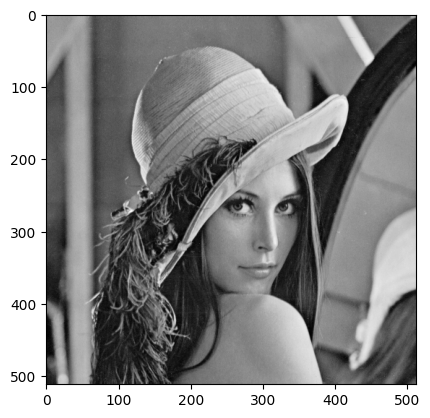

In [102]:
# Load image
image = cv2.imread('../../data/lenna_test_image.png')

# To grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(gray, cmap='gray')  
plt.show() 

In the below code, Sobel kernels are used to compute the gradient of an image. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


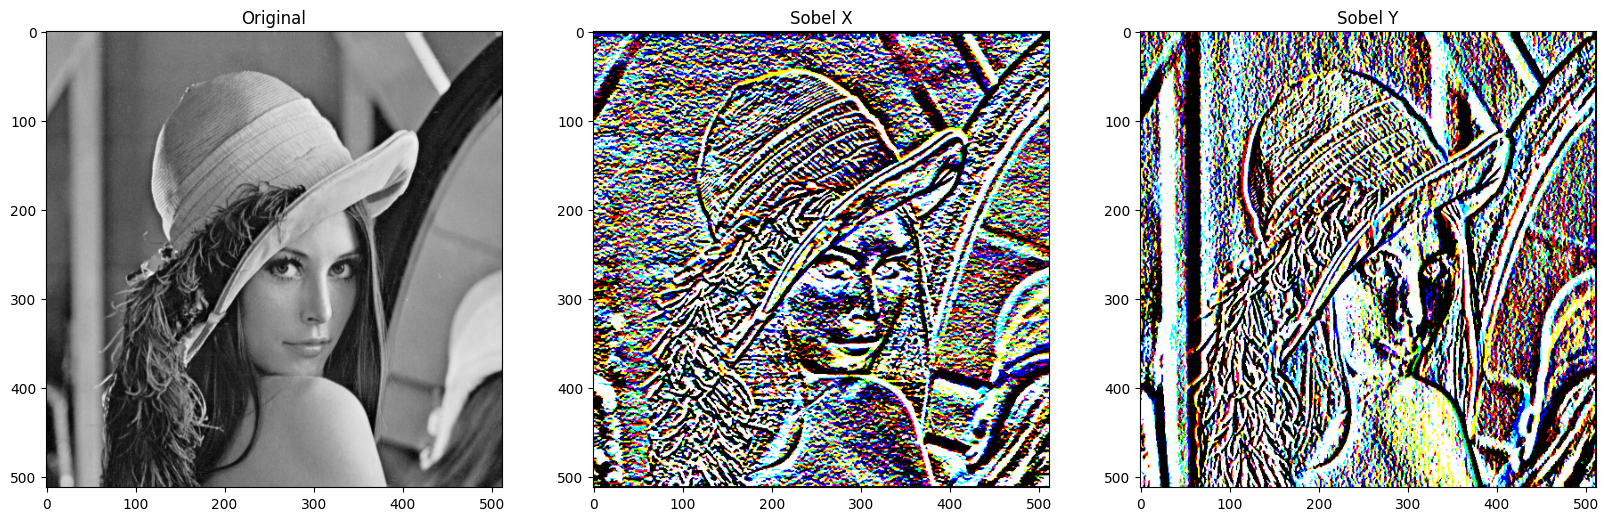

In [103]:
# Gradients in x-direction
x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Gradients in y-direction
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

# Show images
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')  
plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(x_sobel, cmap='gray')  
plt.subplot(1, 3, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel, cmap='gray')  

In the code below, edges are detected using the Canny Edge Detection algorithm.

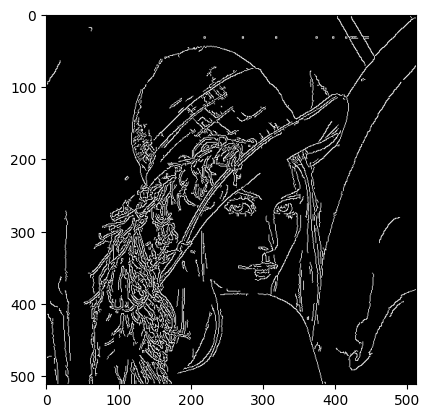

In [104]:
# Canny edge detection
edges = cv2.Canny(image,100,200)

# Show image
plt.imshow(edges, cmap='gray')  
plt.show() 